# Welcome to our first pilot of the ING Code Breakfast Sessions!
18-12-2020 - Alexandru Coser, Cecilia Miao, Santiago Gil

Some brief description or image?


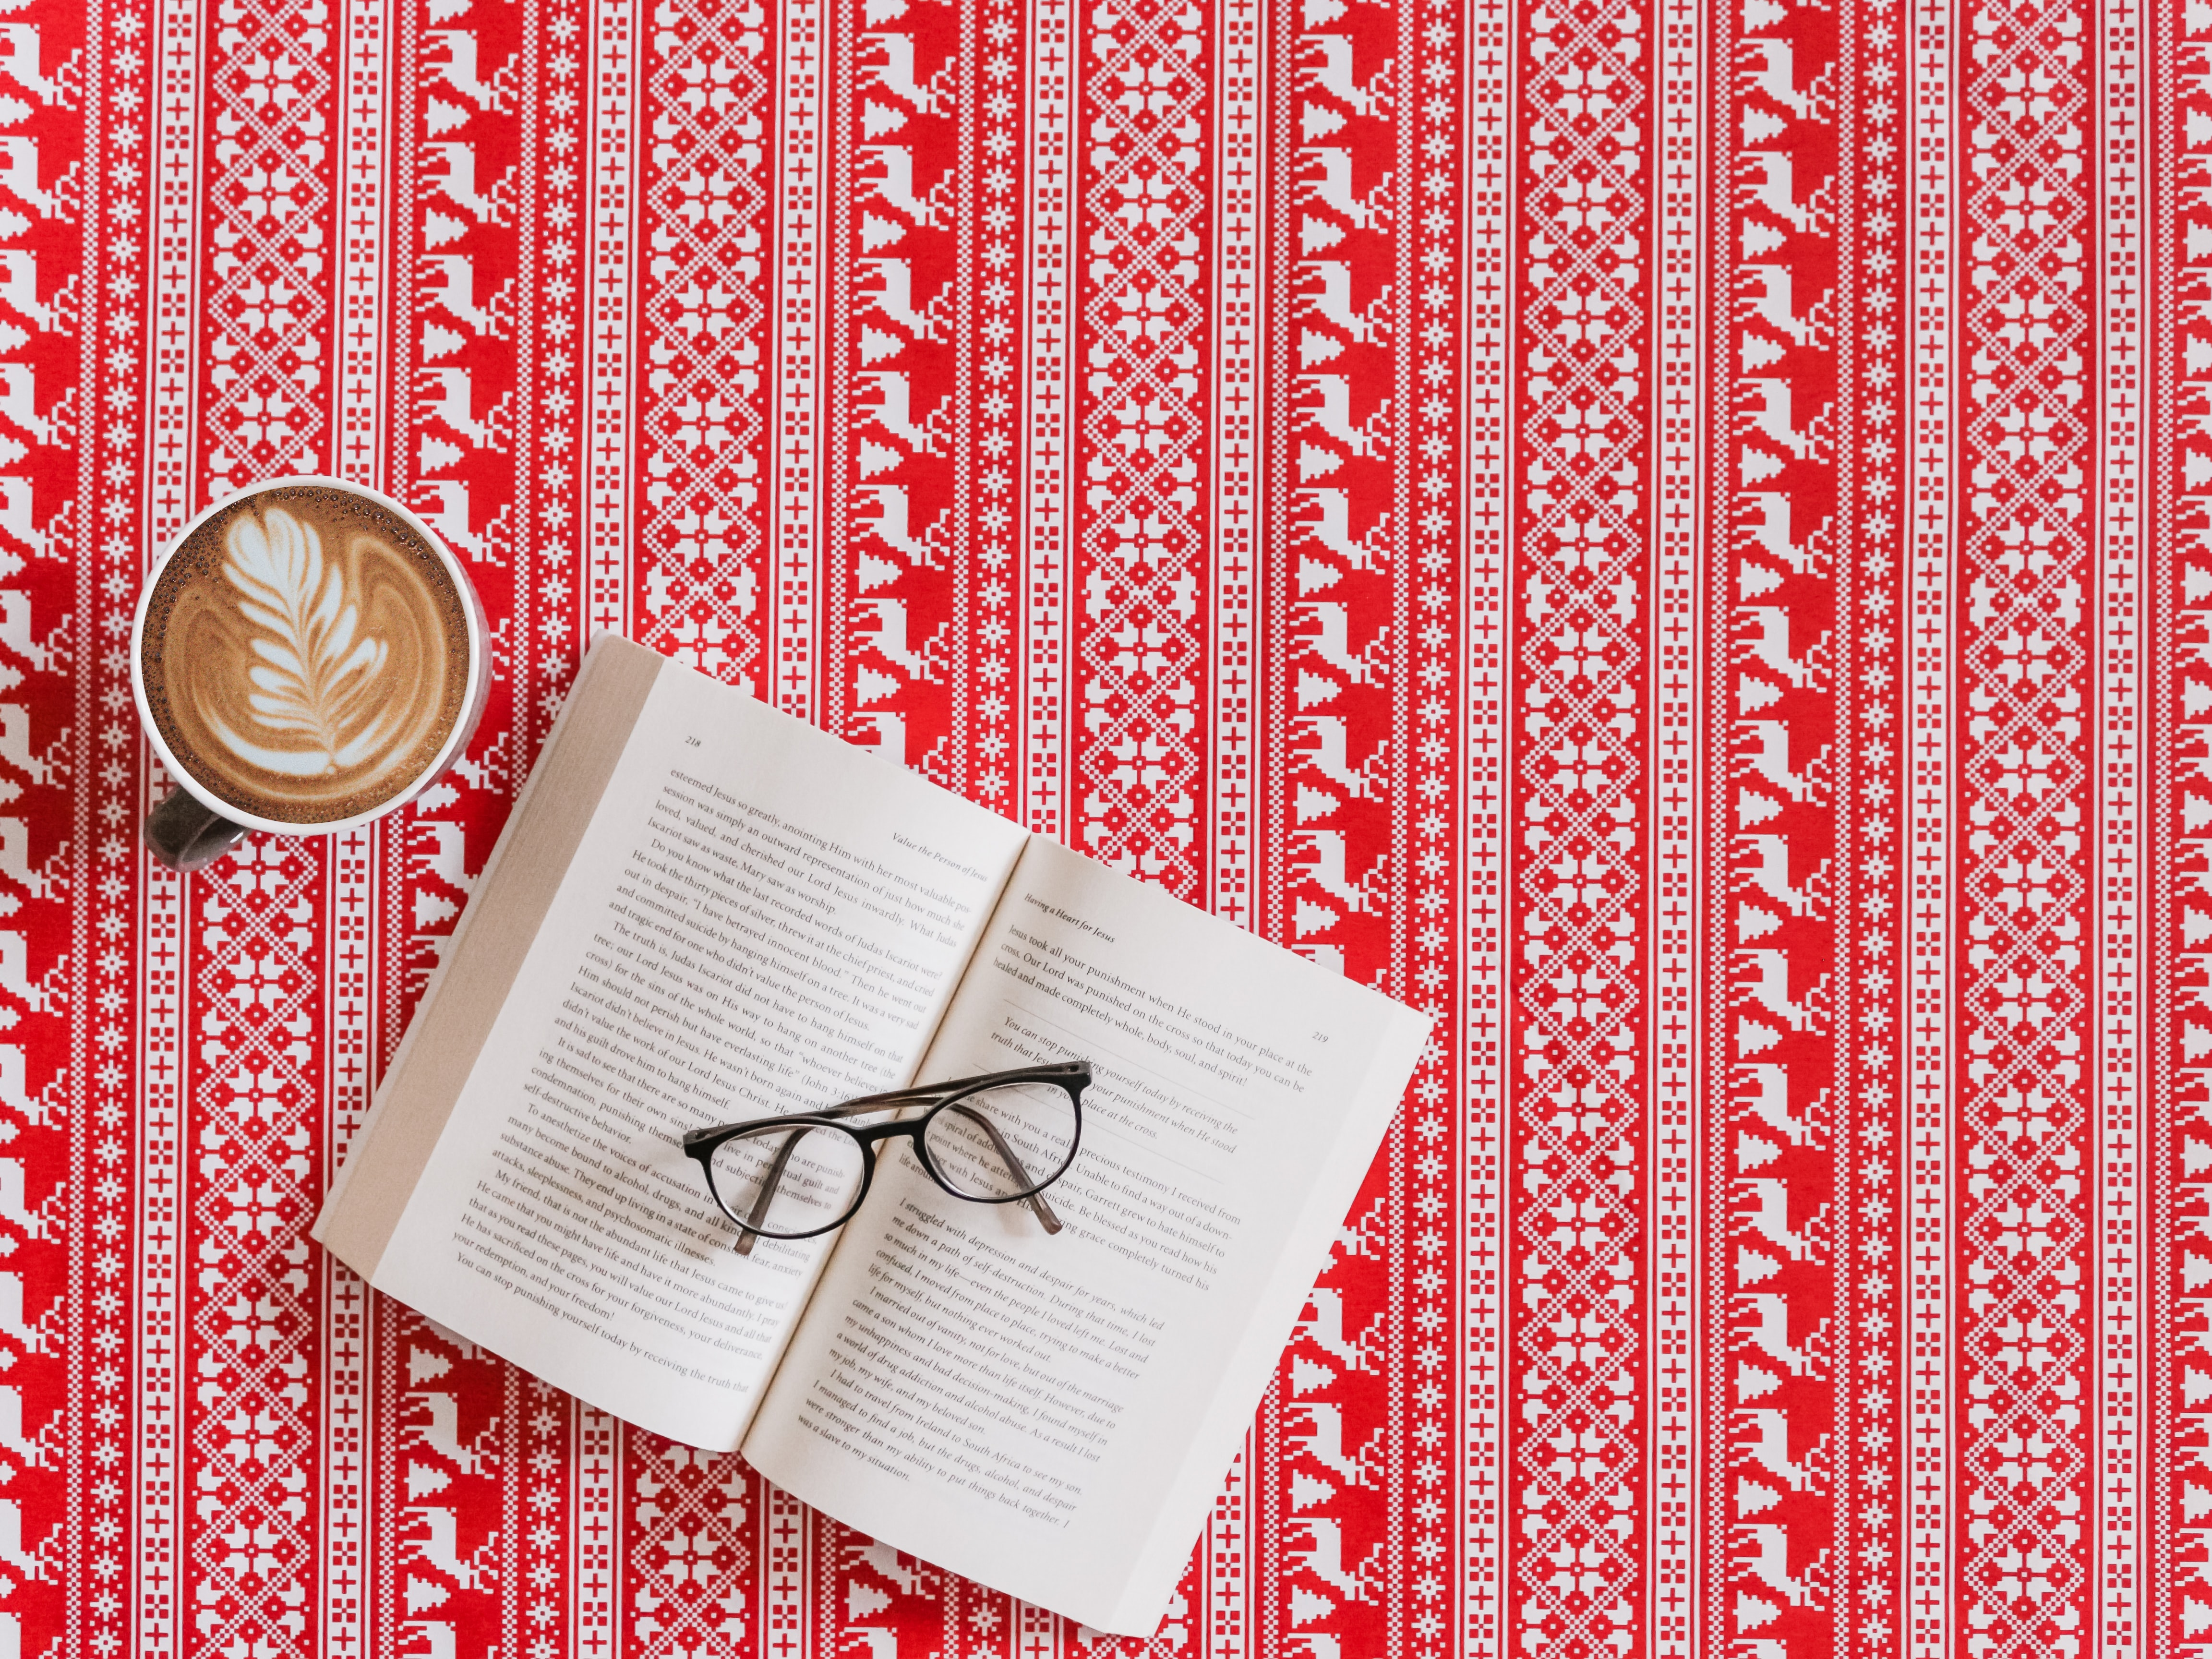

## Let's create some random teams!

In [ ]:
import random
import numpy as np

atendees = np.array(['Pepe1', 'Pepe2', 'Pepe3', 'Pepe4',
                     'Pepe5', 'Pepe6', 'Pepe7', 'Pepe8'])

team_names = ['CROISSANTS',
              'PANCAKES',
              'FRUITS',
              'CREPES',
              'CEREALS',
              'COOKIES'] 

people_per_team = 5
number_teams = np.ceil(len(atendees) / people_per_team)

random.shuffle(atendees)
attendees_to_teams = range(len(atendees)) % number_teams

for i in range(int(number_teams)):
  print(f'TEAM {team_names[i]}')
  print('-' * len(f'TEAM {team_names[i]}'))
  print(*atendees[attendees_to_teams == i], sep='\n')
  print()

TEAM CROISSANTS
---------------
Pepe2
Pepe7
Pepe4
Pepe1

TEAM PANCAKES
-------------
Pepe6
Pepe5
Pepe3
Pepe8



**Best Python libraries for validating data:**

https://www.yeahhub.com/7-best-python-libraries-validating-data/

In [ ]:
!pip install cerberus
!pip install Faker
!pip install schema
!pip install nbgrader
!pip install pygooglenews

In [ ]:
from cerberus import Validator

**Next steps to do:**
- Practical example with Pandas DataFrame on a "day to day use" -> **Alex** - not needed anymore
- Nullabe -> **Santiago**
- Type checking -> **Santiago**
- Contains -> **Santiago**
- Nice to have: Maybe add other **`Validation Rules`** if there is something nice and interesting -> **Santiago**
- RegEx: -> **Alex**
  - check `email` - should be enough
  - check `mobile phone` - maybe used for exercise session
  - check `IBAN` or maybe checking the `length` - maybe used for exercise session
- Validation result of a Pandas DataFrame column could be saved in the same dataset, create some flags (True/False) if it's validated (good) or not; maybe save a timestamp when the validation was performed -> **Alex** - not needed anymore, we said Cerberus is mainly used to validate schemas in dict format, not for Pandas.

- Reformat the notebook examples (text and squeezed examples) -> **Everyone**
- Exercise story creation (code) -> **Cecilia**
- Exercise story creation (text) -> 
- Presentation (Preparing slides) -> **Alex**
- Team generation function (decide the team name and write function) -> **Santiago**

# Cerberus at hand!



*   schema = {'name': {'type': 'string'}}
*   v = Validator(schema)

In [ ]:
v = Validator()

## Example 1: Type checking


### String & Integer validation


**Cerberus `types`**:
- The following is a first simple demonstration of Cerberus data validation package. With the `type` rule, we set the **expected data type** of a field.
- In our first example, we want to validate a **name** field; we expect it to be a `string` value.
- Next, we want to define a new variable that takes **integer** values. Thus, we set the **type** to `integer`.

**Cerberus `min` and `max` rules**:
- The `min` and `max` rules set the **minimum** and **maximum** values allowed for `integer`, `float` and `number` types.
- For `string` types, we can use **minlength** and **maxlength**.

In [ ]:
# Import the Validator class from Cerberus package
from cerberus import Validator

We define the **schema**. It is a Python dictionary. 

We specify that the `name` field must be a string. Also, we define `age` and set a minimum value of **20**.

In [ ]:
schema = {'name': {'type': 'string'},
          'age':  {'type': 'integer', 'min': 20}}

In [ ]:
document = {'name': 'Charles Davis', 'age': 22}

In [ ]:
v = Validator(schema)

In [ ]:
v.validate(document)

True

In [ ]:
v.errors

{}

## Example 2: Nulls handling

In [ ]:
document = {'foo': [1, 2, 3, None, 5, 6]}

In [ ]:
schema = {'foo': {'nullable': True}}
v.validate(document)

True

In [ ]:
v.errors

{}

## Example 3: Allowing the Unknown

By default **only keys defined** in the schema are **allowed**.

However, you can *allow unknown* document **keys pairs** by either setting `allow_unknown` to `True`

In [ ]:
schema = {'name': {'type': 'string'},
          'age':  {'type': 'integer', 'min': 20}}

In [ ]:
v.validate({'name': 'John', 'sex': 'M'})

False

In [ ]:
#v.schema = {}
v.allow_unknown = True

In [ ]:
v.validate({'name': 'John', 'sex': 'M'})

True

## Example 4: Contains, allowed and forbidden

- **contains**: This rule validates that the a container object contains **all** of the defined items.

In [ ]:
document = {'foo': ['breakfast', 'lunch', 'dinner']}

In [ ]:
schema = {'foo': {'contains': 'breakfast'}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'contains': ['breakfast', 'lunch']}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'contains': 'snack'}}
v.validate(document, schema)

False

In [ ]:
v.errors

{'foo': ["missing members {'snack'}"]}

- **allowed**: Validates the target value if the value is in the allowed values. If the target value is an iterable, all its members must be in the allowed values.

In [ ]:
schema = {'foo': {'allowed': ['breakfast', 'lunch', 'dinner']}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'allowed': ['breakfast', 'lunch']}}
v.validate(document, schema)

False

In [ ]:
v.errors

{'foo': ["unallowed values ['dinner']"]}

- **forbidden**: Opposite to allowed this validates if a value is any but one of the defined values.


In [ ]:
schema = {'foo': {'forbidden': ['snack']}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'forbidden': ['breakfast']}}
v.validate(document, schema)

False

In [ ]:
v.errors

{'foo': ["unallowed values ['breakfast']"]}

- We can combine all them in a same validation

In [ ]:
schema = {'foo': {'contains': ['breakfast'],
                  'forbidden': ['snack']}}
v.validate(document, schema)

True

## Example 5: User defined checks with check_with

Validates the value of a field by calling either a function or method.

A function must be implemented like the following prototype:

```
def functionnname(field, value, error):
    if value is invalid:
        error(field, 'error message')
```

The `error` argument points to the calling validator’s `_error` method. See [Extending Cerberus](https://docs.python-cerberus.org/en/stable/customize.html) on how to submit errors.

Here’s an example that tests whether an integer is odd or not:

In [ ]:
def oddity(field, value, error):
    if value % 2 == 0:
        error(field, "Must be an odd number")

Then, we can validate a value like this:

In [ ]:
schema = {'amount': {'type': 'integer',
                     'check_with': oddity}}

In [ ]:
document = {'amount': 9}
v.validate(document, schema)

True

In [ ]:
document = {'amount': 10}
v.validate(document, schema)

False

In [ ]:
v.errors

{'amount': ['Must be an odd number']}

## Example 6: Dependencies

### This rule allows we to define a single field name and multiple field names with underlying dependencies

In [ ]:
# Field 2 will exist only with the pre-condition of existence of field 1
schema = {'field1': {'required': False}, 'field2': {'required': False, 'dependencies': 'field1'}}
document = {'field1': 7}
print(v.validate(document, schema))

document = {'field2': 7}
print(v.validate(document, schema))
print(v.errors)

True
False
{'field2': ["field 'field1' is required"]}


In [ ]:
Schema(lambda n: n > 0).validate(-12)

SchemaError: ignored

In [ ]:
from schema import Use
Schema(Use(lambda x: abs(x))).validate(-12)

12

In [ ]:
def generate ([.......]):
gerate

In [ ]:
from schema import Regex
import re
Regex(r'^foo').validate('foobar')
'foobar'

'foobar'

In [ ]:
Regex(r'^[A-Z]+$', flags=re.I).validate('those-dashes-dont-match')

SchemaError: ignored

## Example 7: RegEx patterns


**RegEx** = **Reg**ular **Ex**pressions: 
- https://docs.python.org/3/library/re.html

> **Metacharacters**:
- Metacharacters are characters with a special meaning:

| Character | Description                                                                  |
|-----------|------------------------------------------------------------------------------|
| []        | A set of characters                                                          |
| \         | Signals a special sequence (can also be used to escape   special characters) |
| .         | Any character (except newline character)                                     |
| ^         | Starts with                                                                  |
| $         | Ends with                                                                    |
| *         | Zero or more occurrences                                                     |
| +         | One or more occurrences                                                      |
| {}        | Exactly the specified number of occurrences                                  |
| \|        | Either or                                                                    |
| ()        | Capture and group                                                            |


> **Special Sequences**:
- A special sequence is a **`\`** followed by one of the characters in the list below, and has a special meaning:

| Character | Description                                                                                                                                                                                                       |
|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| \A        | Returns a match if the specified characters are at the   beginning of the string                                                                                                                                  |
| \b        | Returns a match where the specified characters are at the   beginning or at the end of a word (the "r" in the beginning is making sure that the string is being treated as a "raw string")|
| \B        | Returns a match where the specified characters are present,   but NOT at the beginning (or at the end) of a word (the "r" in the beginning is making sure that the string is being treated as a "raw string") |
| \d        | Returns a match where the string contains digits (numbers   from 0-9)                                                                                                                                             |
| \D        | Returns a match where the string DOES NOT contain digits                                                                                                                                                          |
| \s        | Returns a match where the string contains a white space   character                                                                                                                                               |
| \S        | Returns a match where the string DOES NOT contain a white   space character                                                                                                                                       |
| \w        | Returns a match where the string contains any word   characters (characters from a to Z, digits from 0-9, and the underscore _   character)                                                                       |
| \W        | Returns a match where the string DOES NOT contain any word   characters                                                                                                                                           |
| \Z        | Returns a match if the specified characters are at the end   of the string                                                                                                                                        |

> **Sets:**
- A set of characters inside a pair of square brackets `[]` with a special meaning.

### Check Email validation using RegEx

The validation will fail if the field’s value does not match the provided regular expression. It is only tested on **string values**.

In [ ]:
schema = {
      'email': {
          'type': 'string',
          'regex': '^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
      }
}

In [ ]:
document = {'email': 'john@example.com'}

In [ ]:
v = Validator(schema)

In [ ]:
v.validate(document, schema)

True

We can also put a specific message when validating the document against the schema:
- If the validation is `True`, then print **"Data is valid"**
- Otherwiese, when validation resolves to `False`, print **"Invalid data"**

In [ ]:
def doc_valid(doc):
  if v.validate(doc):
      print('Data is valid')
  else:
      print('Invalid data')

In [ ]:
doc_valid(document)

Data is valid


### Check another email

In [ ]:
document2 = {'email': 'john_at_example_dot_com'}

In [ ]:
print("Validating doc:", v.validate(document2, schema))
print("Errors:", v.errors)

Validating doc: False
Errors: {'email': ["value does not match regex '^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+$'"]}


In [ ]:
doc_valid(document2)

Invalid data


## Challenge 1 - Customer KYC

### Generate some synthetic data

In [ ]:
from faker import Faker 
import numpy as np


In [ ]:
Faker.seed(0)
fake = Faker()
import pandas as pd

In [ ]:
def create_data(x:int):

  data = []

  for i in range(0, x):
    data_i = {}
    data_i['name'] = fake.name()
    data_i['city'] = fake.city()
    data_i['company'] = fake.company() + ' '+ fake.company_suffix()
    data_i['age'] =  np.random.randint(1,100)
    data_i['job'] = fake.job()
    data_i['address'] = fake.street_address()
    data.append(data_i)

  return data




In [ ]:
df = pd.DataFrame.from_dict(data)

In [ ]:
Schema(lambda n: n < 65).validate(123)

name  ...                        address
0    Tanya Whitaker  ...    5956 Grimes Plaza Suite 635
1       David Scott  ...  28917 Heather Pines Suite 187
2    Elizabeth Hill  ...            76560 Wilson Center
3   Dr. Lisa Hansen  ...    09859 Santana Ford Apt. 141
4   Sheila Mckinney  ...         223 Kristina Crossroad
..              ...  ...                            ...
95     Nicole Brown  ...   51908 Flowers Shore Apt. 996
96     Ashlee White  ...  71331 Monica Meadows Apt. 380
97    Melissa Myers  ...  83148 Morgan Stream Suite 386
98   Richard Morris  ...              7348 Long Centers
99    Jessica Davis  ...            604 Stanley Parkway

[100 rows x 6 columns]

In [ ]:
data = create_data(100)

In [ ]:
data.head(10)

[{'address': '5956 Grimes Plaza Suite 635',
  'age': 98,
  'city': 'Gailstad',
  'company': 'Johnson LLC Group',
  'job': 'Scientist, biomedical',
  'name': 'Tanya Whitaker'},
 {'address': '28917 Heather Pines Suite 187',
  'age': 57,
  'city': 'New Sarahbury',
  'company': 'Greene-Hanson Inc',
  'job': 'Designer, blown glass/stained glass',
  'name': 'David Scott'},
 {'address': '76560 Wilson Center',
  'age': 12,
  'city': 'Lake Leslietown',
  'company': 'Gonzalez PLC Ltd',
  'job': 'Higher education lecturer',
  'name': 'Elizabeth Hill'},
 {'address': '09859 Santana Ford Apt. 141',
  'age': 91,
  'city': 'Port Melissa',
  'company': 'Robinson-Rhodes PLC',
  'job': 'Wellsite geologist',
  'name': 'Dr. Lisa Hansen'},
 {'address': '223 Kristina Crossroad',
  'age': 27,
  'city': 'Johnstonside',
  'company': 'Mullen-Ibarra and Sons',
  'job': 'Child psychotherapist',
  'name': 'Sheila Mckinney'},
 {'address': '194 Doyle Alley Apt. 390',
  'age': 72,
  'city': 'Russellshire',
  'company'

### Exercise 1
- Define a schema using `name` and `experience` keys and set the validation rule to be **minimum 2 years** and **maximum 5 years** of experience.
- Save the new schema using the following name: `schema2`
- validate the following documents:

> **document2:** 
- name = "Charles Davis"
- experience = 1

> **document3:** 
- name = "David Scott"
- experience = 7

In [ ]:
schema2 = {'name': {'type': 'string'},                              # Last Name & First Name
          'experience':  {'type': 'integer', 'min': 2, 'max': 5}}   # Years of experience

In [ ]:
v = Validator(schema2)

In [ ]:
document2 = {'name': 'Charles Davis', 'experience': 1}

In [ ]:
v.validate(document, schema2)

False

In [ ]:
v.errors

{'experience': ['min value is 2']}

In [ ]:
document3 = {'name': 'David Scott', 'experience': 7}

In [ ]:
v.validate(document3, schema2)

False

In [ ]:
v.errors

{'experience': ['max value is 5']}

## Challenge 2 - Google news company name detection

One challenge that we have been facing in our day-to-day business is to preserve the confidentiality of the material non-public information. A specific requirement is to detect and mask our client company names. How could you help ING to facilitate this process using cerberus?

In [ ]:
from pygooglenews import GoogleNews
from collections import defaultdict
import json

In [ ]:
def get_news_headers(num_iter):
  news=defaultdict(list)
  suffices=['N.V.', 'NV', 'BV', 'Corp.', 'B.V.', 'Inc.', 'Ltd.', 'LLC.', 'co.']
  gn = GoogleNews(lang = 'en', country = 'UK')
  for suffix in suffices:
    for j in range(num_iter):
        business = gn.search(suffix)
        for i in business['entries']:
            tokens = i['title'].split('-')[0].split(' ')
            if len(tokens)>=5 and len([x for x in tokens if any([k in x for k in suffices])])>=1:
                news[suffix].append(i['title'].split('-')[0])
    news[suffix] = list(set(news[suffix]))
  return news

In [ ]:
# This takes around 3 mins
company_news = get_news_headers(10)

In [ ]:
# Save as a json object
with open('news.json', 'w') as fp:
    json.dump(company_news, fp)
company_news = json.load(open('news.json'))

Company news object has the key as company suffice and values as hearders. How can you detect company names using cerberus?
Hint: You use regex support within Ceberus.

{'B.V.': ['BV Key Club helps out community ',
  "First 500 doses of COVID vaccine bound for BV, but it's not enough ",
  'How Much Of BV Holding AG (BRN:BVHN) Do Insiders Own? ',
  "'I'm just happy we get to play': BV native Terveer ready for SDSU spring season ",
  'Message from BV Chamber: Support the #ShopBVFirst campaign ',
  'BrightView Holdings Inc. (BV) Soars 4.53% on December 14 ',
  'BV County Supervisors Address Staffing Shortages ',
  'Dryden 44 Euro CLO 2015 B.V. ',
  'BrightView Holdings Inc (BV) Q4 2020 Earnings Call Transcript ',
  'BV Investment Partners sells Franco Signor ',
  'B.V. Srinivas is first Kannadiga to become IYC president ',
  'Schneider Electric Invests in Planon Beheer BV ("Planon") to digitally transform buildings into the healthy and sustainable workplaces of the future ',
  'Sinoboom BV Implements QR Codes to Enhance Customer Service ',
  "Fitch Assigns FBN Finance Company BV's Senior Note Participation Notes Final 'B",
  'Ferratum subsidiary CapitalB